In [1]:
"Utilitários"

# A biblioteca de plotagem de gráficos do python
import numpy as np #Constantes e operações matemáticas básicas
import matplotlib.pyplot as plt #Plotagem 
from matplotlib import animation #Animação
import scipy as sp #Biblioteca para computação matemática, nesse caso usaremos a integral numérica, além dos polinômios de hermite
from scipy.integrate import trapz
from scipy.special import hermite

from math import factorial #!

#Linhas do gráfico
%matplotlib inline

In [2]:
# Definição do fator que multiplica o polinômio de Hermite, consideraremos que a massa da partícula é 1, 
# bem com a constante verdadeira de planck, o omega pertencente a equação vale pi para que a multiplicação
# inicial seja por 1, isso é possível porque o tamanho desses fatores são pequenos o suficiente para não 
# serem necessários para a análise.

def N(n):
    m = 1
    w = np.pi
    hbar = 1
    return ((m*w/(hbar*np.pi))**(1/4)*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n)))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

In [3]:
# Equação com o adicional da exponencial

def psixt(n, x, t):
    Hn=hermite(n)
    a = complex(0,1)
    Pxt = N(n)*Hn(x)*np.exp(-0.5*x**2)*np.exp(-a*(n+1/2)*t*np.pi)
    return Pxt

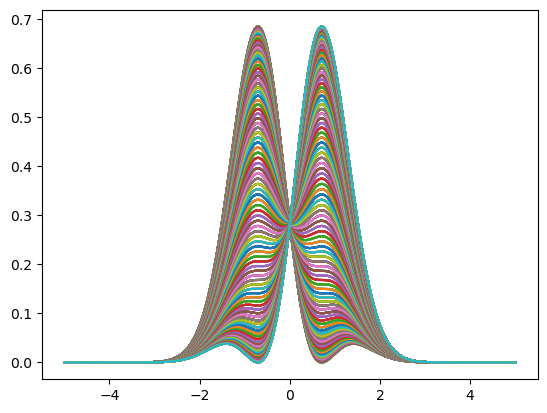

In [4]:
x=np.linspace(-5,5,1000)
psi = np.zeros((1000,1000))
psi_c = [0] * 1000
for i in np.arange(0, 10, 0.01):
    psi = (1/np.sqrt(2)*psixt(0, x, i)+1/np.sqrt(2)*psixt(1, x, i))
    r=round((i)*100,1)
    psi_c[int(r)] = np.array(psi).astype(complex)
    plt.plot(x, np.absolute(psi_c[int(r)])**2)


In [5]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

import random

from os import path # Suficiente para manipulação de arquivos

# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

In [6]:
def N(n):
    return 1*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

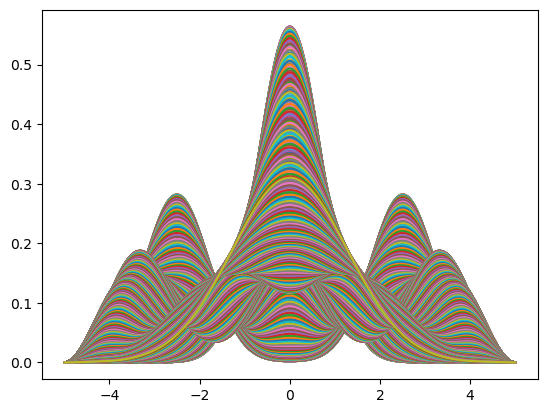

In [7]:
'''
Método de Crank-Nicolson para a solução da equação de Schrödinger em uma única dimensão
    ih * u_t = h_2/2m * u_xx + Vu

Com as condições de contorno não incluídas nessa etapa para que o controle preditivo faça as alterações
Com a equação inicial sendo decidida pelos polinômios de hermite de primeiro e segundo grau

u(x,0) = 0.80 * psi(0, x) + 0.60 * psi(1,x)

A interpretação foi ajustada a partir do código em python da Msc. Mirian Silva
'''

def CrankNicolson(M, O = 0, L = 1, T = 0.5):
    N = 1000 #São os pontos no intervalo de tempo
    
    #Pensando no poço quadrado infinito, temos essas duas limitações, onde L varia
    x0, xL = O, L

    P = 3.141111111111111111111111111
    #Discretização espacial
    dx = (xL - x0)/(P*M-1) 

    #Discretização temporal
    t0, tF = 0, T
    dt = (tF - t0)/(P*N-1)

    #Retorno dos números em um intervalo
    xs = np.linspace(x0, xL, M)
    ts = np.linspace(t0, tF, N)
    
    #Obtenção da matriz psi (Ela acumulará para o psi futuro)
    ps = np.zeros((M, N))
    psi_c = np.zeros((M, N))

    #Condição inicial
    ps[:,0] = 1 * psi(0, xs) + 0 * psi(1,xs) #A primeira coluna da matriz terá a equação inicial, em todas as posições
    psi_c = ps.astype(complex)
    
    for k in range(1,N):

        #Suponha um oscilador harmônico simples
        u = []
        u.append(random.uniform(-200, 200))
        hbar = 1
        m = 1
        w = np.pi
        V = u[0]

        #A partir da demonstração
        a = hbar/(4*m*dx**2) 
        b = 1j*hbar/dt - 2*a - 1/2*V
        c = 1j*hbar/dt + 2*a + 1/2*V

        #Obtenção da matriz
        ##Diagonais principais
        diagPrincipalA = b*np.ones((1,M)) #Cria uma matriz de 1's
        diagPrincipalB = c*np.ones((1,M))

        ##Diagonais secundárias, tem um tamanho a menos
        diagSecundariaA = a*np.ones((1,M-1))
        diagSecundariaB = (-a)*np.ones((1,M-1))

        diagonaisA = [diagPrincipalA, diagSecundariaA, diagSecundariaA]
        matrizA = sparse.diags(diagonaisA, [0, -1, 1], shape=(M,M)).toarray()

        diagonaisB = [diagPrincipalB, diagSecundariaB, diagSecundariaB]         
        matrizB = sparse.diags(diagonaisB, [0, -1, 1], shape=(M,M)).toarray()
    
    
        b = np.matmul(matrizB, np.array(psi_c[0:M, k-1])) #Multiplicação de arrays já que houve uma conversão anterior
        psi_c[0:M, k] = np.linalg.solve(matrizA, b) #Matlab: x = A\b
        plt.plot(xs, np.absolute(psi_c[0:M, k])**2)
    return (psi_c, ts, xs)

psi, ts, xs = CrankNicolson(M = 1000, O = -5, L = 5, T = 10)

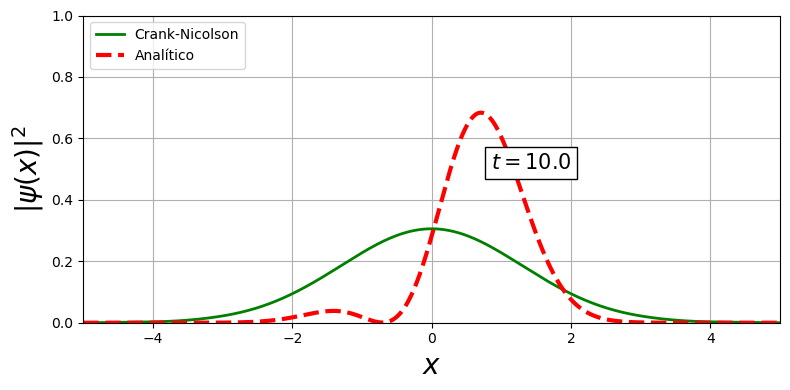

In [8]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

def animate(i):
    ln1.set_data(xs, np.absolute(psi[0:1000, i-1])**2)
    time_text.set_text('$t=$'+'{:.1f}'.format(i/100))
    ln2.set_data(xs, np.absolute(psi_c[i-1])**2)
    #ln3.set_data(xs, np.absolute(np.absolute(psi[0:1000, i-1])**2-np.absolute(psi_c[i-1])**2))
    #ln4.set_data(xs, np.absolute(np.absolute(psi[0:1000, i-1])**2-np.absolute(psi_c[i-1])**2)/np.absolute(psi[0:1000, i-1])**2)
       
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.grid()
ln1, = plt.plot([], [], 'g-', lw=2, markersize=8, label='Crank-Nicolson')
ln2, = plt.plot([], [], 'r--', lw=3, markersize=8, label='Analítico')
#ln3, = plt.plot([], [], 'b-', lw=3, markersize=8, label='Erro absoluto')
#ln4, = plt.plot([], [], 'y--', lw=1, markersize=8, label='Erro relativo')


time_text = ax.text(0.85, 0.5, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(0, 1)
ax.set_xlim(-5,5)
ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.legend(loc='upper left')
ax.set_title('')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=200)
ani.save('comparative3.gif',writer='pillow',fps=50,dpi=100)